In [62]:
import pandas as pd

#Reading the dataset
data = pd.read_csv('personality_dataset.csv')

#Dataset preview
data.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,3.0,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [63]:
#Renaming features for readability
data.rename(columns={'Time_spent_Alone':'Isolation(0-11)hrs/day','Going_outside':'Roaming_out(0-7)',
                     'Drained_after_socializing':'Social_fatigue','Social_event_attendance':
                     'Social_event_attendance(0-10)','Friends_circle_size':'Close_Friends(0-15)',
                     'Post_frequency':'Post_freq(0-10)'},inplace=True)
data.head(5)

,Isolation(0-11)hrs/day,Stage_fear,Social_event_attendance(0-10),Roaming_out(0-7),Social_fatigue,Close_Friends(0-15),Post_freq(0-10),Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [64]:
data.shape

(2900, 8)

In [65]:
#Checking for null values
nulls = data.isnull().sum()
nulls

Isolation(0-11)hrs/day           0
Stage_fear                       0
Social_event_attendance(0-10)    0
Roaming_out(0-7)                 0
Social_fatigue                   0
Close_Friends(0-15)              0
Post_freq(0-10)                  0
Personality                      0
dtype: int64

In [66]:
#As other features have no numerical values, they're ignored for description
data[['Isolation(0-11)hrs/day','Roaming_out(0-7)'
    ,'Social_event_attendance(0-10)','Close_Friends(0-15)',
    'Post_freq(0-10)']].describe()


,Isolation(0-11)hrs/day,Roaming_out(0-7),Social_event_attendance(0-10),Close_Friends(0-15),Post_freq(0-10)
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.000000,3.963354,6.268863,3.564727
std,3.441180,2.221597,2.872608,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000
50%,4.000000,3.000000,3.963354,5.000000,3.000000
75%,7.000000,5.000000,6.000000,10.000000,6.000000
max,11.000000,7.000000,10.000000,15.000000,10.000000


<Axes: >

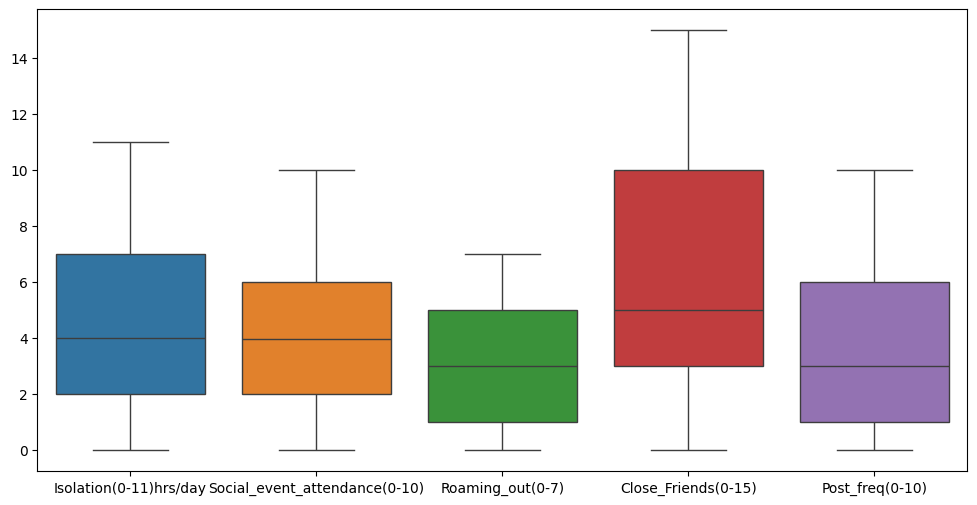

In [67]:
#Discovering outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=data)

Boxplots are used for detecting outliers.
As per above plotting, there are no outliers in our dataset

In [68]:
#Encoding few categorical features for fitting a model
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Stage_fear'] = le.fit_transform(data['Stage_fear'])
data['Social_fatigue'] = le.fit_transform(data['Social_fatigue'])
data['Personality'] = le.fit_transform(data['Personality'])

In [69]:
#Before classifying, data needs to be splitted

from sklearn.model_selection import train_test_split
x = data.drop('Personality', axis=1)
y = data['Personality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#Split has been done successfully

(2030, 7) (870, 7) (2030,) (870,)


Since dataset's target variable is categorical and
almost all the features are effective in determining personality and
we have both numerical and categorical features which are hard to
encode using encoding techniques, we will use RandomForestClassifier

ACCURACY:  0.906896551724138
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       463
           1       0.90      0.90      0.90       407

    accuracy                           0.91       870
   macro avg       0.91      0.91      0.91       870
weighted avg       0.91      0.91      0.91       870

CONFUSION MATRIX: 
 [[424  39]
 [ 42 365]]


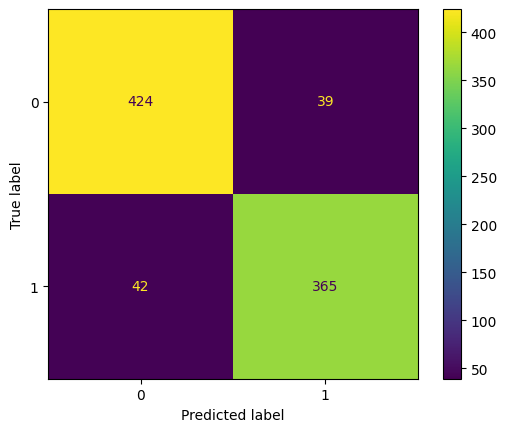

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(y_test,y_pred)
print("ACCURACY: ",accuracy)        
print("CLASSIFICATION REPORT: \n",classification_report(y_test,y_pred))
print("CONFUSION MATRIX: \n",confusion_matrix(y_test,y_pred))
conf = confusion_matrix(y_test,y_pred)
matrix = ConfusionMatrixDisplay(conf,display_labels=model.classes_)
matrix.plot()

In [71]:
data.head(5)
data.dtypes

Isolation(0-11)hrs/day           float64
Stage_fear                         int64
Social_event_attendance(0-10)    float64
Roaming_out(0-7)                 float64
Social_fatigue                     int64
Close_Friends(0-15)              float64
Post_freq(0-10)                  float64
Personality                        int64
dtype: object

In [74]:
import pandas as pd

def prediction(inp) :
    # Convert input list to DataFrame with feature names to match training data
    feature_names = ['Isolation(0-11)hrs/day', 'Stage_fear', 'Social_event_attendance(0-10)', 
                     'Roaming_out(0-7)', 'Social_fatigue', 'Close_Friends(0-15)', 'Post_freq(0-10)']
    inp_df = pd.DataFrame([inp], columns=feature_names)
    
    pred_result = model.predict(inp_df)
    pred_transformed = le.inverse_transform(pred_result)
    if inp[1] == 1 :
        st_f =  'Yes' 
    else : 
        st_f = 'No'
    if inp[4] == 1 :
        sc_f =  'Yes' 
    else : 
        sc_f = 'No'
    df = pd.DataFrame({'Features':['Isolation(0-11)hrs/day','Stage_fear',
                        'Social_event_attendance(0-10)','Roaming_out(0-7)',
                        'Social_fatigue','Close_Friends(0-15)',
                        'Post_freq(0-10)'],
                       'Inputs':[inp[0],st_f,inp[2],inp[3],
                                 sc_f,inp[5],inp[6]]})
    print(df)
    print(f"        \nPersonality --> {pred_transformed}")
    print("These predictions aren't meant to be taken personal...")
inp = []
inp.append(float(input("Enter time spent alone (0-11 hrs/day): ")))
stage_fear = str(input("Do you have stage fear? (YES/NO): "))
if stage_fear.lower() == 'yes':
    inp.append(1)
else:
    inp.append(0)
inp.append(float(input("How frequent do you attend events?(0-10) ")))
inp.append(float(input("How often you roam out?(days/week) : ")))
socialize_effect = str(input("Do you feel drained after socializing(YES/NO): "))
if socialize_effect.lower() == 'yes':
    inp.append(1)
else:
    inp.append(0)
inp.append(float(input("How many close friends do you have?(0-15) : ")))
inp.append(float(input("How frequently do you post on social media?(0-10) : ")))
prediction(inp)

                        Features Inputs
0         Isolation(0-11)hrs/day    2.0
1                     Stage_fear     No
2  Social_event_attendance(0-10)    2.0
3               Roaming_out(0-7)    4.0
4                 Social_fatigue     No
5            Close_Friends(0-15)    8.0
6                Post_freq(0-10)    1.0
        
Personality --> ['Extrovert']
These predictions aren't meant to be taken personal...
